[Probability and Statistics for Data Science](https://www.ps4ds.net/) 

Code for Example 1.36 and 9.46 

Model to predict the results of the 3x3 basketball tournament in the Tokyo 2020 Olympics\
Topics: Monte Carlo simulations, confidence intervals

Author: Carlos Fernandez-Granda

In [3]:
import numpy as np
from itertools import combinations
import matplotlib.pyplot as plt 
import matplotlib
from numpy.random import default_rng
rng = default_rng(2022)

# World ranking points obtained mostly from https://web.archive.org/web/20210704140714/https://fiba3x3.com/en/rankings/individual.html

countries = ["Belgium", "China", "Japan", "Latvia","Netherlands", "Poland", "ROC", "Serbia"]
ranking_points = {}
ranking_points["Belgium"] = [150981,269580,19330,224490] 
ranking_points["China"] = [168242,5400,170280,12600] 
ranking_points["Japan"] = [78827,7006,6961,241224]
ranking_points["Latvia"] = [825366,735840,733800,664146]
ranking_points["Netherlands"] = [481692,15487,255145,15810]
ranking_points["Poland"] = [129899,118883,103807,302319]
ranking_points["ROC"] = [211700,279796,253640,225302]
ranking_points["Serbia"] = [788975,592650,788507,827172]

for country in countries:
    print(country + ": " + str(sum(ranking_points[country]) ))

def ranking_2_probability(country_1,country_2):
    sum_1 = float(sum(ranking_points[country_1]))
    sum_2 = float(sum(ranking_points[country_2]))
    probability = sum_1 / (sum_1 + sum_2)
    return probability

Belgium: 664381
China: 356522
Japan: 334018
Latvia: 2959152
Netherlands: 768134
Poland: 654908
ROC: 970438
Serbia: 2997304


In [4]:
# The games are combinations of the participants
games = list(combinations(countries,2))

# We precompute the probabilities for each game
probabilities = np.zeros(len(games))
for i, game in enumerate(games):
    probabilities[i] = ranking_2_probability(game[0],game[1])
    print("The probability that " + str(game[0]) +" beats " + str(game[1]) +" equals {:0.3f}".format(probabilities[i]))

The probability that Belgium beats China equals 0.651
The probability that Belgium beats Japan equals 0.665
The probability that Belgium beats Latvia equals 0.183
The probability that Belgium beats Netherlands equals 0.464
The probability that Belgium beats Poland equals 0.504
The probability that Belgium beats ROC equals 0.406
The probability that Belgium beats Serbia equals 0.181
The probability that China beats Japan equals 0.516
The probability that China beats Latvia equals 0.108
The probability that China beats Netherlands equals 0.317
The probability that China beats Poland equals 0.352
The probability that China beats ROC equals 0.269
The probability that China beats Serbia equals 0.106
The probability that Japan beats Latvia equals 0.101
The probability that Japan beats Netherlands equals 0.303
The probability that Japan beats Poland equals 0.338
The probability that Japan beats ROC equals 0.256
The probability that Japan beats Serbia equals 0.100
The probability that Latvia b

In [5]:
def simulate_group(print_example):
    wins = {"Belgium" : 0, "China" : 0, "Japan" : 0, "Latvia" : 0, "Netherlands" : 0, "Poland": 0, "ROC": 0, "Serbia" : 0}
    for i, game in enumerate(games):
        if rng.random() < probabilities[i]:
            if print_example:
                print(game[0] + " beats " + game[1])
            wins[game[0]] += 1
        else: 
            if print_example:
                print(game[1] + " beats " + game[0])
            wins[game[1]] += 1
    # We break ties in wins randomly (in reality ties were broken based on scored points)
    classification = sorted(wins.items(), key=lambda x: (x[1], rng.random()), reverse=True)
    if print_example:
        print(classification)
    return classification   

In [6]:
def simulate_bracket(classification, print_example):
    # 3rd seed plays 6th seed
    if rng.random() < ranking_2_probability(classification[2][0],classification[5][0]):
        winner_3_6 = classification[2][0]
        if print_example:
            print(classification[2][0] + " beats " + classification[5][0] + " in the first quarter-final")
    else:
        winner_3_6 = classification[5][0]
        if print_example:
            print(classification[5][0] + " beats " + classification[2][0] + " in the first quarter-final")
    # 4th seed plays 5th seed
    if rng.random() < ranking_2_probability(classification[3][0],classification[4][0]):
        winner_4_5 = classification[3][0]
        if print_example:
            print(classification[3][0] + " beats " + classification[4][0] + " in the second quarter-final")
    else:
        winner_4_5 = classification[4][0]
        if print_example:
            print(classification[4][0] + " beats " + classification[3][0] + " in the second quarter-final")
    # 1st seed plays winner of 4th vs 5th seed
    if rng.random() < ranking_2_probability(classification[0][0],winner_3_6):
        winner_1st_semi = classification[0][0]
        loser_1st_semi = winner_3_6
    else:
        winner_1st_semi = winner_3_6
        loser_1st_semi = classification[0][0]
    if print_example:
        print(winner_1st_semi + " beats " + loser_1st_semi + " in the first semi-final")
    # 2nd seed plays winner of 3rd vs 6th seed
    if rng.random() < ranking_2_probability(classification[1][0],winner_4_5):
        winner_2nd_semi = classification[1][0]
        loser_2nd_semi = winner_4_5
    else:
        winner_2nd_semi = winner_4_5
        loser_2nd_semi = classification[1][0]
    if print_example:
        print(winner_2nd_semi + " beats " + loser_2nd_semi + " in the second semi-final")
    # Final
    if rng.random() < ranking_2_probability(winner_1st_semi,winner_2nd_semi):
        gold = winner_1st_semi
        silver = winner_2nd_semi
    else:
        gold = winner_2nd_semi
        silver = winner_1st_semi
    if print_example:
        print(gold + " beats " + silver + " to win gold!")
    # Bronze-medal game
    if rng.random() < ranking_2_probability(loser_1st_semi,loser_2nd_semi):
        bronze = loser_1st_semi
        fourth = loser_2nd_semi
    else:
        bronze = loser_2nd_semi
        fourth = loser_1st_semi
    if print_example:
        print(bronze + " beats " + fourth + " to win bronze!")
    return (gold, silver, bronze)   

print_example = True
simulate_bracket(simulate_group(print_example),print_example)

Belgium beats China
Belgium beats Japan
Latvia beats Belgium
Belgium beats Netherlands
Poland beats Belgium
ROC beats Belgium
Belgium beats Serbia
China beats Japan
Latvia beats China
Netherlands beats China
Poland beats China
China beats ROC
Serbia beats China
Latvia beats Japan
Netherlands beats Japan
Poland beats Japan
ROC beats Japan
Serbia beats Japan
Netherlands beats Latvia
Poland beats Latvia
Latvia beats ROC
Latvia beats Serbia
Poland beats Netherlands
ROC beats Netherlands
Serbia beats Netherlands
Poland beats ROC
Serbia beats Poland
ROC beats Serbia
[('Poland', 6), ('Latvia', 5), ('Serbia', 4), ('Belgium', 4), ('ROC', 4), ('Netherlands', 3), ('China', 2), ('Japan', 0)]
Serbia beats Netherlands in the first quarter-final
Belgium beats ROC in the second quarter-final
Serbia beats Poland in the first semi-final
Latvia beats Belgium in the second semi-final
Serbia beats Latvia to win gold!
Poland beats Belgium to win bronze!


('Serbia', 'Latvia', 'Poland')

In [7]:
runs = int(1e4)
inv_runs = 1.0 / float(runs)
print_example = False
prob_gold = {"Belgium" : 0, "China" : 0, "Japan" : 0, "Latvia" : 0, "Netherlands" : 0, "Poland": 0, "ROC": 0, "Serbia" : 0}
prob_silver = {"Belgium" : 0, "China" : 0, "Japan" : 0, "Latvia" : 0, "Netherlands" : 0, "Poland": 0, "ROC": 0, "Serbia" : 0}
prob_bronze = {"Belgium" : 0, "China" : 0, "Japan" : 0, "Latvia" : 0, "Netherlands" : 0, "Poland": 0, "ROC": 0, "Serbia" : 0}
prob_win_group = {"Belgium" : 0, "China" : 0, "Japan" : 0, "Latvia" : 0, "Netherlands" : 0, "Poland": 0, "ROC": 0, "Serbia" : 0}
    
for i in range(runs):
    classification = simulate_group(print_example)
    prob_win_group[classification[0][0]] += inv_runs
    (gold, silver, bronze) = simulate_bracket(classification,print_example)
    prob_gold[gold] += inv_runs
    prob_silver[silver] += inv_runs
    prob_bronze[bronze] += inv_runs

print("Probability of gold")
for country in prob_gold:
    print(country + ": {:0.4f}".format(prob_gold[country]))
print("\nProbability of silver")
for country in prob_silver:
    print(country + ": {:0.4f}".format(prob_silver[country]))
print("\nProbability of bronze")
for country in prob_bronze:
    print(country + ": {:0.4f}".format(prob_bronze[country]))
print("\nProbability of winning group stage")
for country in prob_win_group:
    print(country + ": {:0.4f}".format(prob_win_group[country]))

Probability of gold
Belgium: 0.0223
China: 0.0029
Japan: 0.0022
Latvia: 0.4200
Netherlands: 0.0355
Poland: 0.0224
ROC: 0.0629
Serbia: 0.4318

Probability of silver
Belgium: 0.0847
China: 0.0174
Japan: 0.0174
Latvia: 0.2804
Netherlands: 0.1034
Poland: 0.0765
ROC: 0.1493
Serbia: 0.2709

Probability of bronze
Belgium: 0.1135
China: 0.0310
Japan: 0.0247
Latvia: 0.1892
Netherlands: 0.1436
Poland: 0.1131
ROC: 0.1887
Serbia: 0.1962

Probability of winning group stage
Belgium: 0.0237
China: 0.0035
Japan: 0.0017
Latvia: 0.4285
Netherlands: 0.0322
Poland: 0.0213
ROC: 0.0562
Serbia: 0.4329


In [ ]:
runs_list = [int(1e4),int(1e6),int(1e7)] # [int(1e8)] Warning: Running for 1e8 can take a while on a laptop
print_example = False

for runs in runs_list:
    selected_runs = 0
    counts_gold = {"Belgium" : 0, "China" : 0, "Japan" : 0, "Latvia" : 0, "Netherlands" : 0, "Poland": 0, "ROC": 0, "Serbia" : 0}
    counts_silver = {"Belgium" : 0, "China" : 0, "Japan" : 0, "Latvia" : 0, "Netherlands" : 0, "Poland": 0, "ROC": 0, "Serbia" : 0}
    counts_bronze = {"Belgium" : 0, "China" : 0, "Japan" : 0, "Latvia" : 0, "Netherlands" : 0, "Poland": 0, "ROC": 0, "Serbia" : 0}
    counts_win_group = {"Belgium" : 0, "China" : 0, "Japan" : 0, "Latvia" : 0, "Netherlands" : 0, "Poland": 0, "ROC": 0, "Serbia" : 0}

    for i in range(runs):
        classification = simulate_group(print_example)
    # check if Serbia was 7th or 8th in group
        if classification[6][0] == "Serbia" or classification[7][0] == "Serbia":
            selected_runs += 1
            counts_win_group[classification[0][0]] += 1.0
            (gold, silver, bronze) = simulate_bracket(classification,print_example)
            counts_gold[gold] += 1.0
            counts_silver[silver] += 1.0
            counts_bronze[bronze] += 1.0

    print("Total: " + str(runs))
    print("Selected runs: " + str(selected_runs))
    print("Probability of Serbia not making the bracket: {:0.4f}".format(float(selected_runs)/float(runs)))
    print("Probability of gold conditioned on Serbia not making the bracket")
    for country in prob_gold:
        print(country + ": {:0.4f}".format(counts_gold[country]/selected_runs))
    # print("\nProbability of silver conditioned on Serbia not making the bracket")
    # for country in prob_silver:
    #     print(country + ": {:0.4f}".format(counts_silver[country]/selected_runs))
    # print("\nProbability of bronze conditioned on Serbia not making the bracket")
    # for country in prob_bronze:
    #     print(country + ": {:0.4f}".format(counts_bronze[country]/selected_runs))
    # print("\nProbability of winning group stage conditioned on Serbia not making the bracket")
    # for country in prob_win_group:
    #     print(country + ": {:0.4f}".format(counts_win_group[country]/selected_runs))

Serbia: 0.4120
0.3810
0.4430
Latvia: 0.4290
0.3980
0.4600
Serbia: 0.4303
0.4272
0.4334
Latvia: 0.4207
0.4176
0.4238


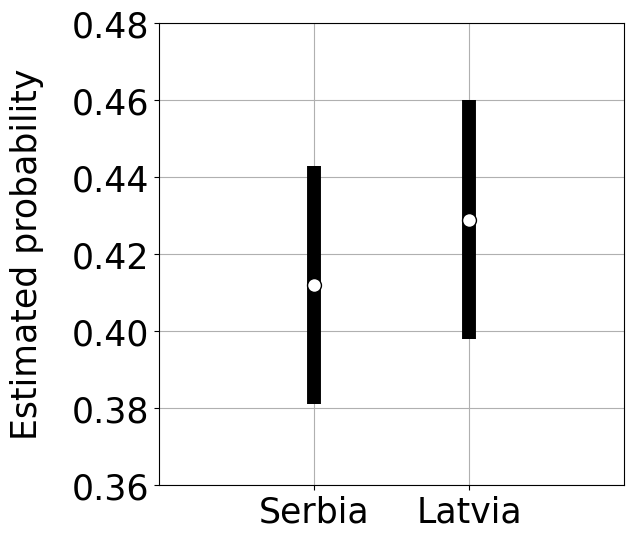

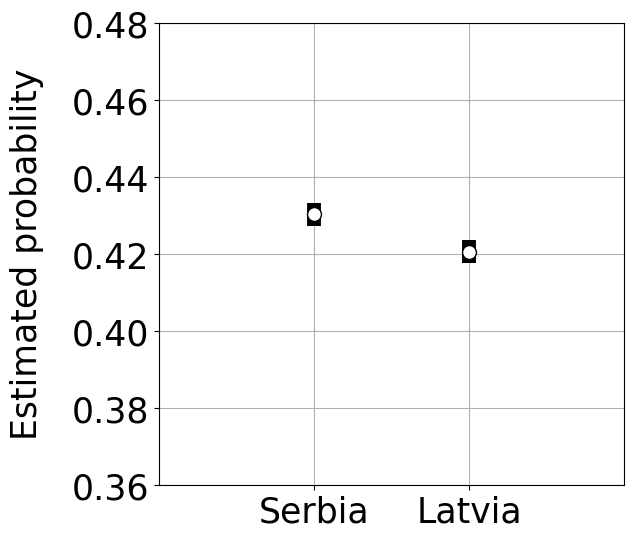

In [16]:
font_size = 25
font_size_legend = 25
font_size_ticks = 25

# Confidence intervals for the probability of a gold medal for Serbia and Latvia

rng = default_rng(2022)
run_vals = [int(1e3),int(1e5)]
y_min = 0.36
y_max = 0.48

for runs in run_vals:
    inv_runs = 1.0 / float(runs)
    print_example = False
    prob_gold = {"Serbia" : 0, "Latvia" : 0, "ROC": 0,"Netherlands" : 0,  "Belgium" : 0, "Poland": 0, "China" : 0, "Japan" : 0 }
    
    for i in range(runs):
        classification = simulate_group(print_example)
        (gold, silver, bronze) = simulate_bracket(classification,print_example)
        prob_gold[gold] += inv_runs
        
    countries = prob_gold.keys()
    
    serbia_latvia = ['Serbia', 'Latvia']
    prob_gold_sl = {k:v for k,v in prob_gold.items() if k in serbia_latvia}
    
    plt.figure(figsize=(6,6))
    plt.xticks(range(len(prob_gold_sl)),prob_gold_sl.keys(),fontsize=font_size_ticks)#, rotation='vertical') 
    plt.yticks(fontsize=font_size_ticks) 
    plt.xlim(-1,2)
    plt.ylim(y_min,y_max)
    plt.ylabel(r"Estimated probability",fontsize=font_size,labelpad=20)
    for ind,country in enumerate(prob_gold_sl):
        print(country + ": {:0.4f}".format(prob_gold_sl[country]))
        bound_aux = 0.5 # Because the true population theta_pop is smaller than 1, this bounds theta_pop * (1 - theta_pop), see equation (9.217)
        Phi_inv = 1.96 # Inverse cdf of 1-0.05/2
        half_width = bound_aux * Phi_inv / np.sqrt(runs)
        l = prob_gold_sl[country] - half_width
        u = prob_gold_sl[country] + half_width
        print("{:0.4f}".format(l))
        print("{:0.4f}".format(u))
        plt.vlines(ind,l,u,lw=10,color="black")
        plt.grid(True)
        plt.plot(ind,prob_gold_sl[country],"o",markersize=10,markeredgewidth=1,markerfacecolor = "white",markeredgecolor = "black")